Exploratory data analysis with Python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
data = pd.read_csv(DATA_URL + "adult.data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


How many men and women (sex feature) are represented in this dataset?


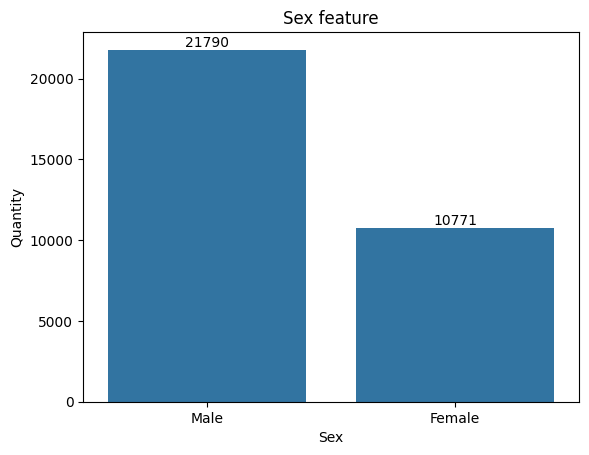

In [ ]:
df = pd.DataFrame(data)
# Count male and female
count_sex = df['sex'].value_counts()

# Create the graph
ax = sns.barplot(x=count_sex.index, y=count_sex.values)

# Show the numbers on top
for container in ax.containers:
    ax.bar_label(container)

# Titles
plt.xlabel("Sex")
plt.ylabel("Quantity")
plt.title("Sex feature")

plt.show()

What is the average age (age feature) of women?




In [21]:
average_age_women = df[df['sex'] == 'Female']['age'].mean()
print(average_age_women)

36.85823043357163


What is the percentage of German citizens (native-country feature)?

In [ ]:

german_count = df[df['native-country'] == 'Germany'].shape[0]

total_count = df.shape[0]

german_percentage = (german_count / total_count) * 100

print(f"There is a total of {german_count} German citizens with a percentage of {german_percentage:.3f}%")


There is a total of 137 German citizens with a percentage of 0.421%


Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

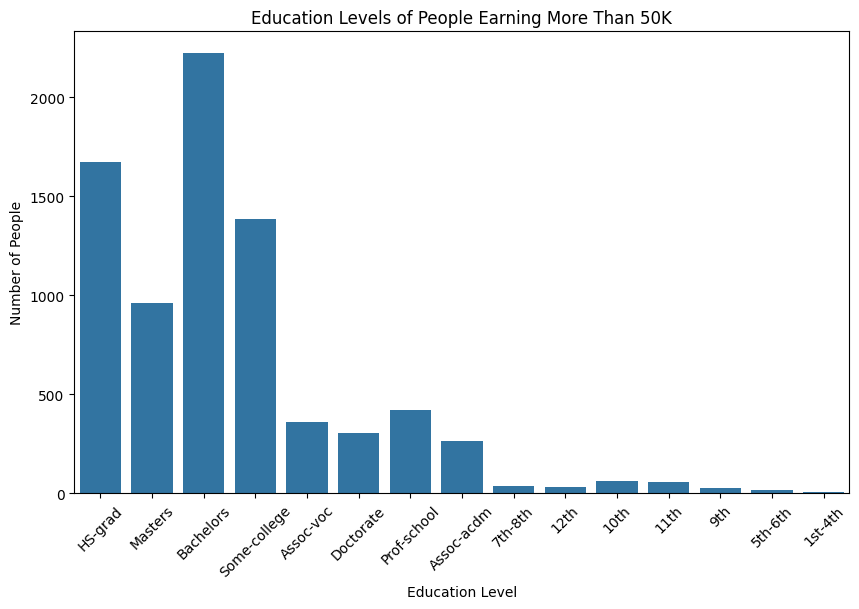

In [53]:
high_earners = df[df['salary'] == '>50K']

plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=high_earners)

# Etiquetas y título
plt.xlabel("Education Level")
plt.ylabel("Number of People")
plt.title("Education Levels of People Earning More Than 50K")
plt.xticks(rotation=45)

plt.show()

Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?

   native-country salary  hours-per-week
47          Japan  <=50K       41.000000
48          Japan   >50K       47.958333


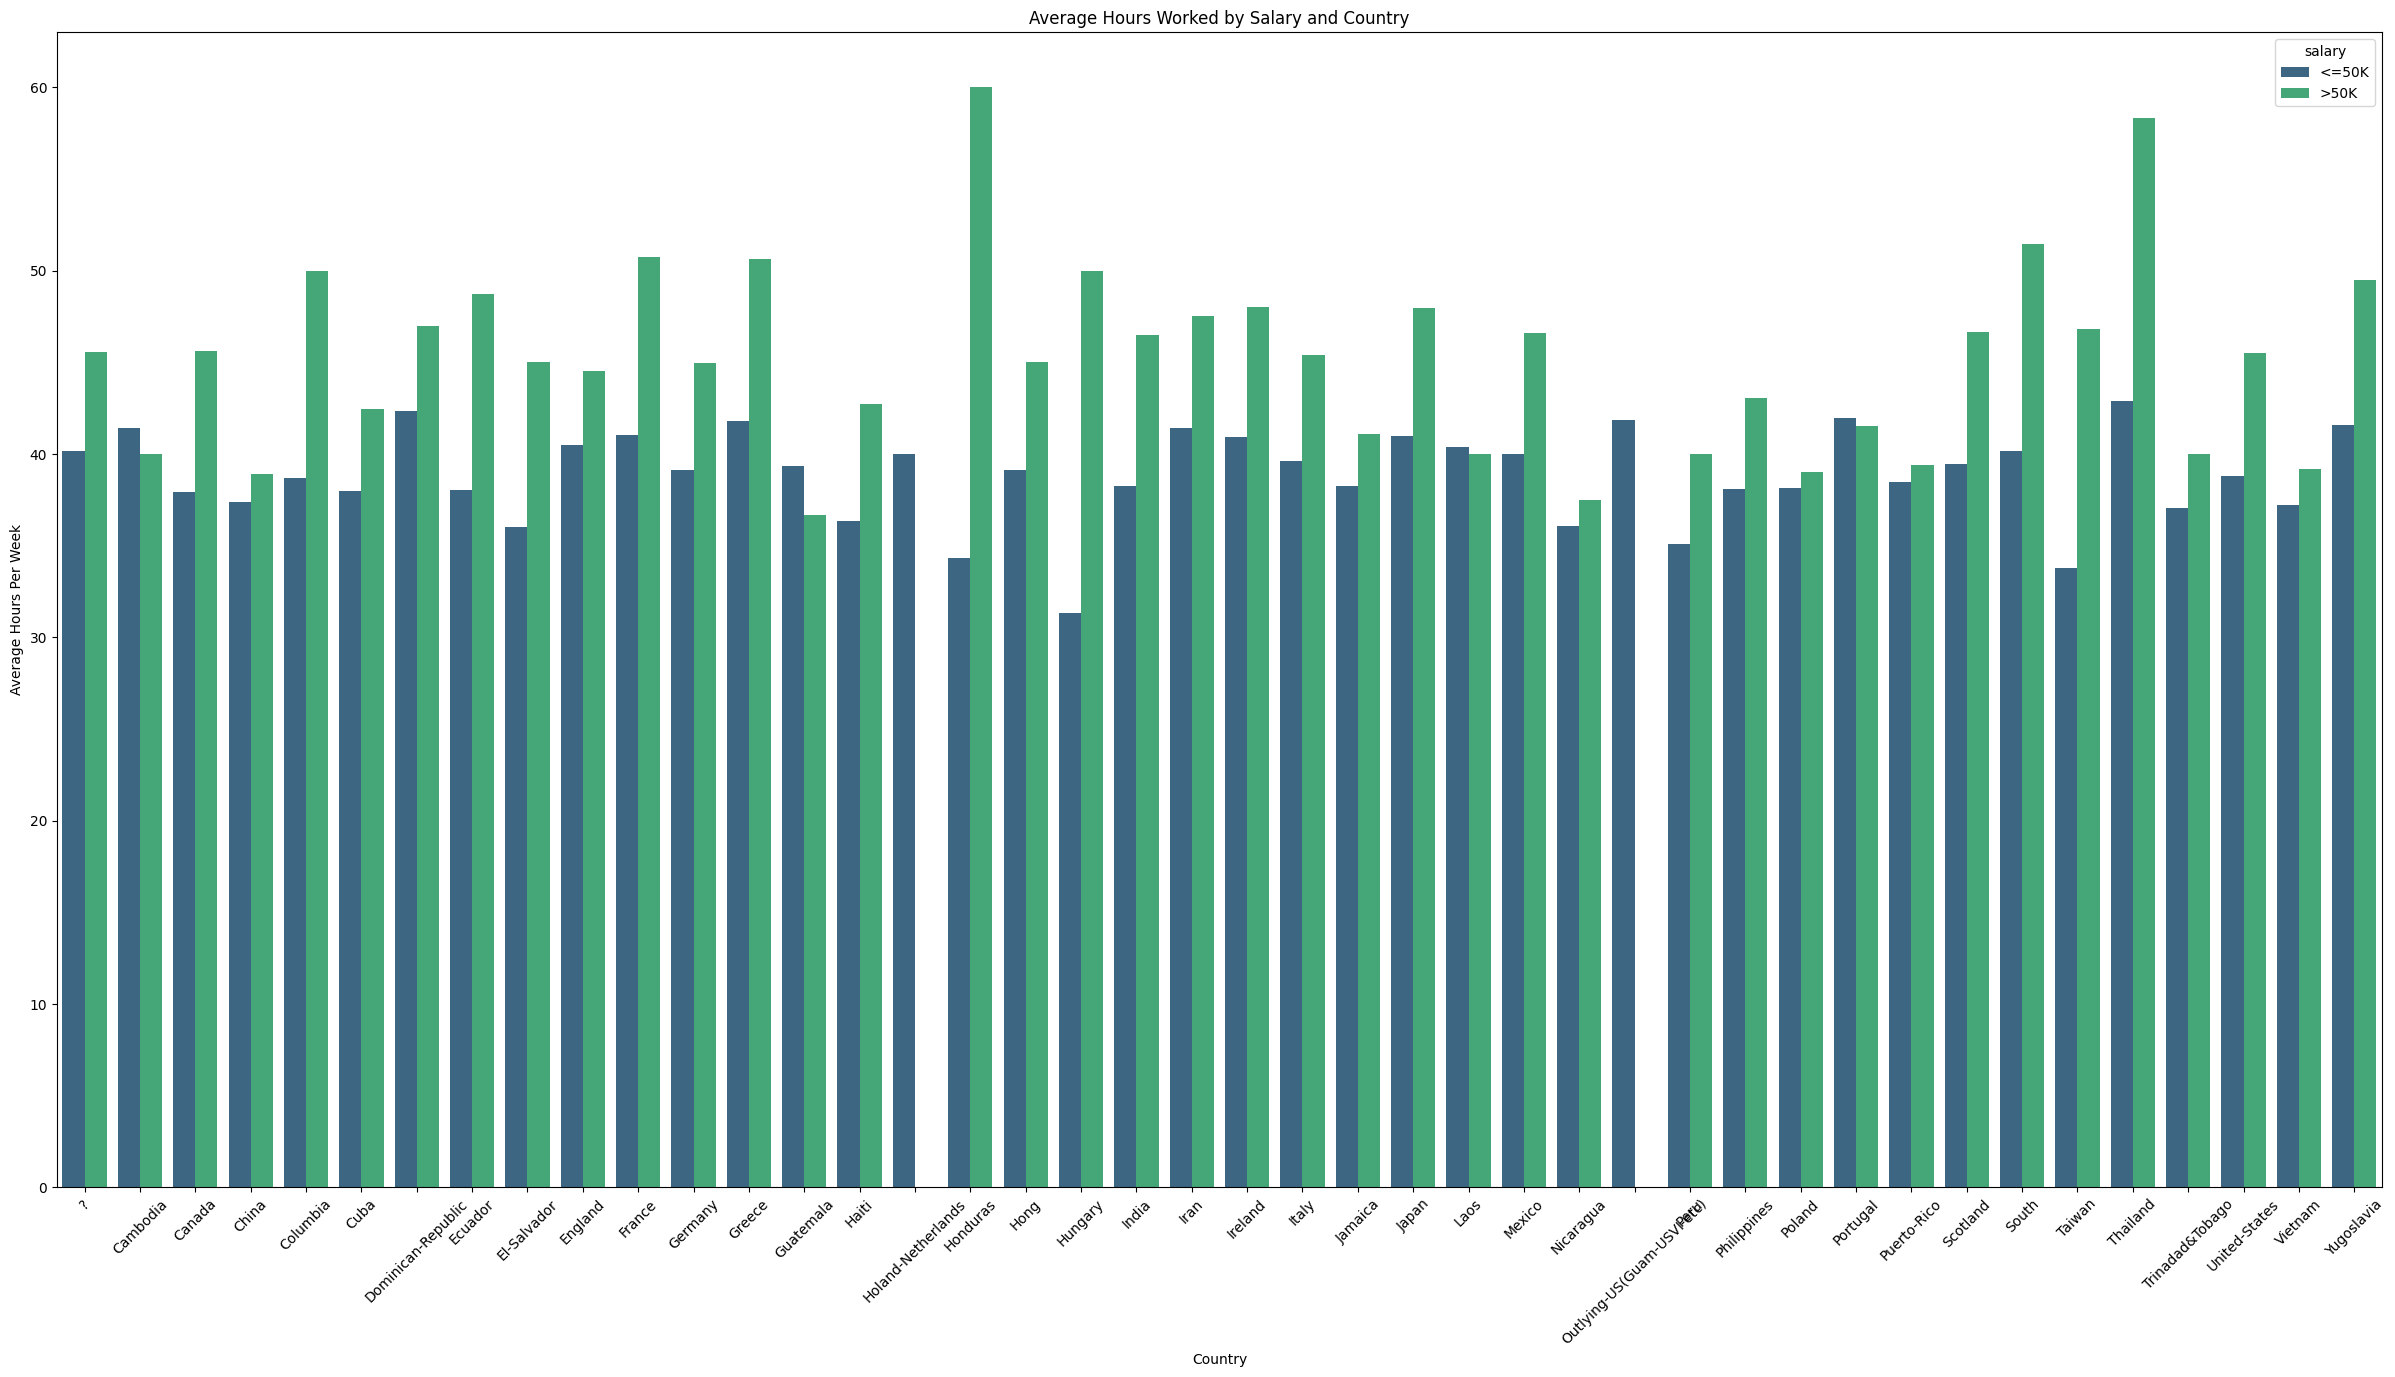

In [59]:
average_hours_by_country_salary = df.groupby(['native-country', 'salary'])['hours-per-week'].mean().reset_index()

# Filtrar los datos para Japón
japan_data = average_hours_by_country_salary[average_hours_by_country_salary['native-country'] == 'Japan']

# Mostrar el promedio de horas para Japón
print(japan_data)

# Crear gráfico para la media de horas trabajadas por país y salario
plt.figure(figsize=(30, 15))
sns.barplot(x='native-country', y='hours-per-week', hue='salary', data=average_hours_by_country_salary, palette="viridis")

# Etiquetas y título
plt.xlabel("Country")
plt.ylabel("Average Hours Per Week")
plt.title("Average Hours Worked by Salary and Country")
plt.xticks(rotation=45)

plt.show()